In [2]:
import pandas as pd

# Read the data
data = pd.read_csv('diabetes.csv')



In [3]:
# Print properties
print(data.head())  # Display the first few rows


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print(data.shape)   # Number of rows and columns


(768, 9)


In [5]:
print(data.columns) # Column names


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [6]:
print(data.dtypes)  # Data types of columns


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [7]:
print(data.info())  # Summary of the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [8]:
print(data['Outcome'].value_counts())  # Count of each outcome class


0    500
1    268
Name: Outcome, dtype: int64


In [9]:
#Build Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Prepare X and y
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# Create and fit Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
# Predict on a New Sample
new_person = [[6, 200, 90, 10, 25, 23.3, 0.672, 42]]
prediction = logistic_model.predict(new_person)
print(f"Will this person become diabetic? Prediction: {prediction}")


Will this person become diabetic? Prediction: [1]


In [13]:
#Compute Classification Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, AUC: {auc}")


Accuracy: 0.7604166666666666, Precision: 0.6842105263157895, Recall: 0.582089552238806, AUC: 0.8176716417910447


In [14]:
# Normalization using MinmaxScaler and Rebuilding Logistic Regression
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on X_train
X_train_normalized = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_normalized = scaler.transform(X_test)

# Create a new Logistic Regression model
logistic_model_normalized = LogisticRegression()

# Fit the model on the normalized training set
logistic_model_normalized.fit(X_train_normalized, y_train)

# Predict on the normalized test set
y_pred_normalized = logistic_model_normalized.predict(X_test_normalized)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
#Normalization using StandardScaler and Rebuilding Logistic Regression
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_standard = StandardScaler()

# Fit and transform the StandardScaler on X_train
X_train_standardized = scaler_standard.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_standardized = scaler_standard.transform(X_test)

# Create a new Logistic Regression model
logistic_model_standardized = LogisticRegression()

# Fit the model on the standardized training set
logistic_model_standardized.fit(X_train_standardized, y_train)

# Predict on the standardized test set
y_pred_standardized = logistic_model_standardized.predict(X_test_standardized)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
# Plotting ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Compute ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 800x600 with 1 Axes>

In [17]:
# Comparison with KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier (using default parameters)
knn_classifier = KNeighborsClassifier()

# Fit the KNN classifier on MinMaxScaler scaled data
knn_classifier.fit(X_train_normalized, y_train)

# Predict on the normalized test set
y_pred_knn = knn_classifier.predict(X_test_normalized)

# Compute and print classification metric scores for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, knn_classifier.predict_proba(X_test_normalized)[:, 1])

print(f"KNN Classifier Scores - Accuracy: {accuracy_knn}, Precision: {precision_knn}, Recall: {recall_knn}, AUC: {auc_knn}")


KNN Classifier Scores - Accuracy: 0.703125, Precision: 0.5862068965517241, Recall: 0.5074626865671642, AUC: 0.7391641791044776


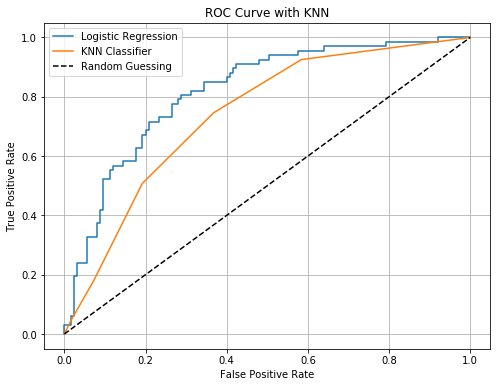

In [18]:
#Updating ROC Curve
# Get predicted probabilities for the positive class from KNN
y_pred_prob_knn = knn_classifier.predict_proba(X_test_normalized)[:, 1]

# Compute ROC curve values for KNN: fpr_knn, tpr_knn, thresholds_knn
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)

# Plot ROC curve with KNN included
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label='KNN Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with KNN')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
from sklearn.linear_model import LogisticRegressionCV

# Create Logistic RegressionCV models with L1 and L2 regularization
logistic_cv_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear')
logistic_cv_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2')

# Fit the models on MinMaxScaler scaled data
logistic_cv_l1.fit(X_train_normalized, y_train)
logistic_cv_l2.fit(X_train_normalized, y_train)

# Predict on the normalized test set for both models
y_pred_cv_l1 = logistic_cv_l1.predict(X_test_normalized)
y_pred_cv_l2 = logistic_cv_l2.predict(X_test_normalized)

# Compute classification metric scores for both models
accuracy_cv_l1 = accuracy_score(y_test, y_pred_cv_l1)
precision_cv_l1 = precision_score(y_test, y_pred_cv_l1)
recall_cv_l1 = recall_score(y_test, y_pred_cv_l1)
auc_cv_l1 = roc_auc_score(y_test, logistic_cv_l1.predict_proba(X_test_normalized)[:, 1])

accuracy_cv_l2 = accuracy_score(y_test, y_pred_cv_l2)
precision_cv_l2 = precision_score(y_test, y_pred_cv_l2)
recall_cv_l2 = recall_score(y_test, y_pred_cv_l2)
auc_cv_l2 = roc_auc_score(y_test, logistic_cv_l2.predict_proba(X_test_normalized)[:, 1])

print("Logistic RegressionCV L1 Scores:")
print(f"Accuracy: {accuracy_cv_l1}, Precision: {precision_cv_l1}, Recall: {recall_cv_l1}, AUC: {auc_cv_l1}")

print("\nLogistic RegressionCV L2 Scores:")
print(f"Accuracy: {accuracy_cv_l2}, Precision: {precision_cv_l2}, Recall: {recall_cv_l2}, AUC: {auc_cv_l2}")


Logistic RegressionCV L1 Scores:
Accuracy: 0.7604166666666666, Precision: 0.6779661016949152, Recall: 0.5970149253731343, AUC: 0.8260298507462687

Logistic RegressionCV L2 Scores:
Accuracy: 0.7552083333333334, Precision: 0.6666666666666666, Recall: 0.5970149253731343, AUC: 0.8235223880597015


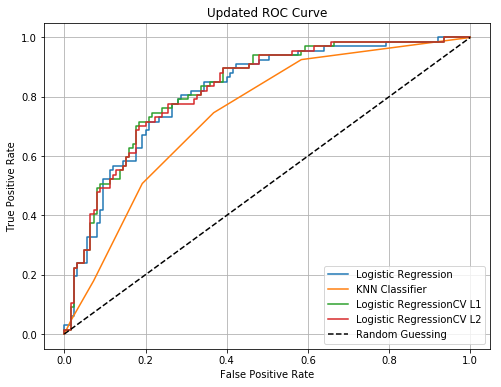

In [20]:
#
# Get predicted probabilities for the positive class from Logistic RegressionCV models
y_pred_prob_cv_l1 = logistic_cv_l1.predict_proba(X_test_normalized)[:, 1]
y_pred_prob_cv_l2 = logistic_cv_l2.predict_proba(X_test_normalized)[:, 1]

# Compute ROC curve values for Logistic RegressionCV models: fpr_cv_l1, tpr_cv_l1, fpr_cv_l2, tpr_cv_l2
fpr_cv_l1, tpr_cv_l1, _ = roc_curve(y_test, y_pred_prob_cv_l1)
fpr_cv_l2, tpr_cv_l2, _ = roc_curve(y_test, y_pred_prob_cv_l2)

# Plot updated ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label='KNN Classifier')
plt.plot(fpr_cv_l1, tpr_cv_l1, label='Logistic RegressionCV L1')
plt.plot(fpr_cv_l2, tpr_cv_l2, label='Logistic RegressionCV L2')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Updated ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
